# GluonTS - Transfer Learning Approach (quarterly) 

- Two datasets: A and B
- Dataset A: Dataset subsetted by frequency, i.e. `m4_quarterly_atm`
- Dataset B: Dataset subsetted by frequency and by domain, i.e. `m4_quarterly_industry`
- Network A: Trained on dataset A
- Network B: Trained on dataset B
- Both networks are evaluated on dataset B. 

- Adjust epochs to account for different size of the datasets

Goal: Check TZ1: "Does the network learn from time series of the same domain or is it helpful to use time series from other domains?"

- Both networks are trained for ten trials (deepar) or three trials (deepstate)

Note that there are already results where a network is trained on `m4_frequency_domain` and evaluated on the same network.

In [17]:
!pip install mxnet=="1.4.1"

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
!pip install gluonts

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Imports



In [19]:
import gluonts
import mxnet

print(gluonts.__version__)
print(mxnet.__version__)

0.4.2
1.4.1


In [20]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


In [21]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_end2003q3', 'm4_quarterly_end2013q1', 'm4_quarterly_end2015q1', 'm4_quarterly_finance', 'm4_quarterly_id

In [22]:
dataset = get_dataset("m4_weekly", regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly.


### mv the data

Before moving on: Move the respective data according the required folder structure. In AWS:

- `mv [dataname] ../../.mxnet/gluon-ts/datasets/`

## Check the data

In [23]:
dataname_a = "m4_quarterly_atm"
dataset_a = get_dataset(dataname_a, regenerate=False)
len(dataset_a.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.


24000

In [24]:
dataname_b1 = "m4_quarterly_macro"
dataset_b1 = get_dataset(dataname_b1, regenerate=False)
len(dataset_b1.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_macro.


5315

In [25]:
dataname_b2 = "m4_quarterly_micro"
dataset_b2 = get_dataset(dataname_b2, regenerate=False)
len(dataset_b2.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_micro.


6020

In [26]:
dataname_b3 = "m4_quarterly_other"
dataset_b3 = get_dataset(dataname_b3, regenerate=False)
len(dataset_b3.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_other.


865

In [27]:
dataname_b4 = "m4_quarterly_finance"
dataset_b4 = get_dataset(dataname_b4, regenerate=False)
len(dataset_b4.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_finance.


5305

In [28]:
dataname_b5 = "m4_quarterly_industry"
dataset_b5 = get_dataset(dataname_b5, regenerate=False)
len(dataset_b5.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_industry.


4637

In [29]:
dataname_b6 = "m4_quarterly_demographic"
dataset_b6 = get_dataset(dataname_b6, regenerate=False)
len(dataset_b6.train)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_demographic.


1858

### Dataset A


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 24000
length test: 24000

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


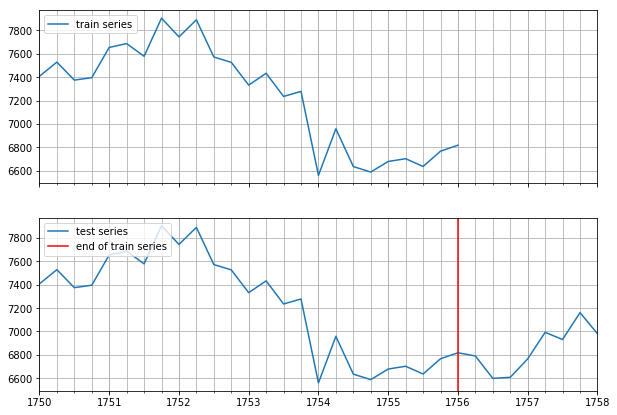

In [30]:
train_entry_a = next(iter(dataset_a.train))
test_entry_a = next(iter(dataset_a.test))

print(train_entry_a.keys())
print(test_entry_a.keys())
print("length train:", len(dataset_a.train))
print("length test:", len(dataset_a.test))


print("\nstart:\n",train_entry_a["start"])
print("target:\n", train_entry_a["target"][:10])
print("feat_static_cat:\n", train_entry_a["feat_static_cat"])

train_series_a = to_pandas(train_entry_a)
test_series_a = to_pandas(test_entry_a)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_a.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_a.plot(ax=ax[1])
ax[1].axvline(train_series_a.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Dataset B

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train: 5315
length test: 5315

start:
 1750-01-31 00:00:00
target:
 [7407.412  7528.566  7374.709  7395.5146 7654.008  7686.8477 7578.191
 7904.3765 7744.0493 7889.909 ]
feat_static_cat:
 [1]


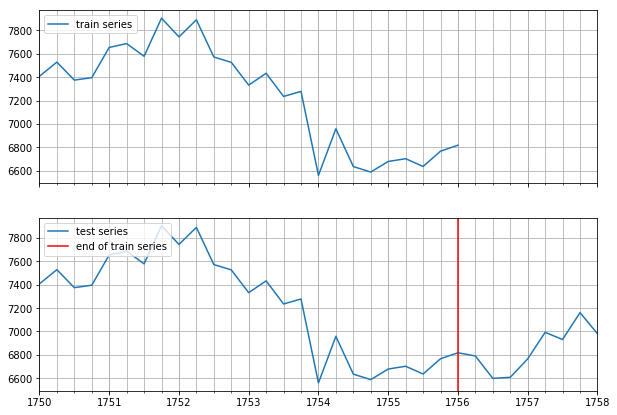

In [31]:
dataset_b = dataset_b1

train_entry_b = next(iter(dataset_b.train))
test_entry_b = next(iter(dataset_b.test))

print(train_entry_b.keys())
print(test_entry_b.keys())
print("length train:", len(dataset_b.train))
print("length test:", len(dataset_b.test))

print("\nstart:\n",train_entry_b["start"])
print("target:\n", train_entry_b["target"][:10])
print("feat_static_cat:\n", train_entry_b["feat_static_cat"])

train_series_b = to_pandas(train_entry_b)
test_series_b = to_pandas(test_entry_b)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series_b.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series_b.plot(ax=ax[1])
ax[1].axvline(train_series_b.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

## Comparison of both datasets

- Compare whether both datasets have the same length


In [32]:
# Check length
print("Length test train:", len(dataset_a.train) == len(dataset_b.train))
print("Length test test:", len(dataset_a.test) == len(dataset_b.test))

# Check frequency
print("Frequency test:",(dataset_a.metadata.freq == dataset_b.metadata.freq))


Length test train: False
Length test test: False
Frequency test: True


## Modeling: DeepAR

In [33]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [34]:
# A: dataset_a
# B: dataset_b
print(dataset_a)
print("\n", dataset_b)

TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='24000')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f44be872b38>, test=<gluonts.dataset.common.FileDataset object at 0x7f44be872c50>)

 TrainDatasets(metadata=MetaData(freq='3M', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='5315')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=8), train=<gluonts.dataset.common.FileDataset object at 0x7f44be864128>, test=<gluonts.dataset.common.FileDataset object at 0x7f44be864160>)


In [35]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


In [36]:
def deepar_train_eval(dataname_a, dataname_b, seed=42, epochs=100, num_batches=100):
    """
    Function that trains a network using data from dataset B and evaluates the trained network on dataset A.
    Dataset A is the dataset of interest for our analysis. 
    """    
    
    dataset_a = get_dataset(dataname_a, regenerate=False)
    dataset_b = get_dataset(dataname_b, regenerate=False)
    
    # Assert checks
    assert (dataset_a.metadata.freq == dataset_b.metadata.freq)
#     assert ( len(dataset_a.train)==len(dataset_b.train) )
#     assert ( len(dataset_a.test)==len(dataset_b.test))
    
    mx.random.seed(seed)
    np.random.seed(seed)

    # define trainer
    trainer=Trainer(
        ctx=mx.cpu(),
        epochs=epochs,
        num_batches_per_epoch=num_batches,
        learning_rate=1e-3,
    )

    estimator=DeepAREstimator(
        trainer=trainer,
        context_length=dataset_a.metadata.prediction_length,
        prediction_length=dataset_a.metadata.prediction_length,
        freq=dataset_a.metadata.freq,
        use_feat_static_cat=False,
    )
    
#     estimator = DeepAREstimator(
#         trainer=trainer,
#         cardinality= [
#             feat_static_cat.cardinality 
#             for feat_static_cat in dataset_a.metadata.feat_static_cat
#         ],
#         context_length=dataset_a.metadata.prediction_length,
#         prediction_length=dataset_a.metadata.prediction_length,
#         freq=dataset_a.metadata.freq,
#         use_feat_static_cat=True
#     )
    
    # predictor trained on dataset_a, evaluated on dataset_b
    predictor_a=estimator.train(training_data=dataset_a.train)
    
    forecast_it, ts_it = make_evaluation_predictions(
        dataset_b.test, predictor=predictor_a, num_samples=100
    )
    
    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series = len(dataset_b.test))
    
    metrics=["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}
    
    output["seed"]=seed
    output["epochs"]=epochs
    output["num_batches"]=num_batches
    output["train data"]=dataname_a
    output["eval data"]=dataname_b
    
    df=pd.DataFrame([output])

    return df

    

## Subsets

In [37]:
print(dataname_a)
print(dataname_b1)

m4_quarterly_atm
m4_quarterly_macro


## Study 1: `m4_quarterly_atm` vs. `m4_quarterly_macro` trained network

- Alternating between Run I - 10 trials A:B vs. 
- Run II - 10 trials of B:B


In [38]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_macro", dataname_b="m4_quarterly_macro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 2: `m4_quarterly_atm` vs. `m4_quarterly_micro` trained network

- Alternating between A:B and B:B

In [39]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_micro", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 3: `m4_quarterly_atm` vs `m4_quarterly_other`

- Alternating between A:B and B:B

In [40]:
# results = pd.DataFrame()

# for i in range(42,45):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_other", dataname_b="m4_quarterly_other", seed=i, epochs=400, num_batches=200)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 4: `m4_quarterly_atm` vs `m4_quarterly_finance`

In [41]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_finance", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

In [43]:
results = pd.DataFrame()

for i in range(45,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_atm.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 200/200 [00:05<00:00, 36.33it/s, avg_epoch_loss=7.64]
INFO:root:Epoch[0] Elapsed time 5.510 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.638260
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 41.55it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[1] Elapsed time 4.822 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.262387
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 42.30it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[2] Elapsed time 4.738 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.168165
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=7.03]
INFO:root:Epoch[3] Elapsed time 5.053 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.025387
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.71it/s, avg_epoch_loss=

INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 200/200 [00:04<00:00, 41.48it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[37] Elapsed time 4.827 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.792899
INFO:root:Loading parameters from best epoch (27)
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 42.50it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[38] Elapsed time 4.713 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.775963
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 40.90it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[39] Elapsed time 4.894 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.812376
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 200/200 [00:04<00:00, 40.26it/s, avg_epoch_loss=6.9]
INFO:root:Epoch[40] Elapsed time 4.972 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.895712
INFO:root:Epoch[41] Learning rate is 0.00025
100%|██████████

INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 37.12it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[73] Elapsed time 5.390 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.811769
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 38.34it/s, avg_epoch_loss=6.93]
INFO:root:Epoch[74] Elapsed time 5.229 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.929232
INFO:root:Epoch[75] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 39.97it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[75] Elapsed time 5.012 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.734149
INFO:root:Epoch[76] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 37.73it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[76] Elapsed time 5.308 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.725110
INFO:root:Epoch[77] Learning rate is 6.25e-05
100%|██████████| 200/200 [00:05<00:00, 37.27it/s, avg_epoc

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.702524
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.60it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[110] Elapsed time 4.810 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.816350
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.05it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[111] Elapsed time 5.128 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.823538
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.97it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[112] Elapsed time 5.274 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.771792
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.16it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[113] Elapsed time 4.990 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.698123
INFO:root:Epoch[114] Learning rate is 5e-05


100%|██████████| 200/200 [00:04<00:00, 41.83it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[146] Elapsed time 4.786 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.708851
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 42.54it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[147] Elapsed time 4.706 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.662517
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.66it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[148] Elapsed time 5.462 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.777970
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.13it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[149] Elapsed time 5.113 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.738076
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.71it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.61it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[183] Elapsed time 4.813 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.705592
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.06it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[184] Elapsed time 5.124 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.584852
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.20it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[185] Elapsed time 5.380 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.780948
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.91it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[186] Elapsed time 5.021 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.767742
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.85it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.667842
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.46it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[220] Elapsed time 5.490 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.760599
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[221] Elapsed time 5.051 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.675515
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.23it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[222] Elapsed time 5.102 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.567850
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.83it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[223] Elapsed time 5.294 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.710109
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:05<00:00, 39.51it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[256] Elapsed time 5.069 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.694734
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.54it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[257] Elapsed time 5.195 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.651019
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.08it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[258] Elapsed time 5.259 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.652866
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.28it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[259] Elapsed time 5.371 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.594943
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.60it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.28it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[293] Elapsed time 5.226 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.507107
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.68it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[294] Elapsed time 4.922 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.651245
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.70it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[295] Elapsed time 5.044 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.716619
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.82it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[296] Elapsed time 5.158 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.645291
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.39it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.592641
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 38.34it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[330] Elapsed time 5.222 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.551964
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 37.52it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[331] Elapsed time 5.334 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.666794
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 39.04it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[332] Elapsed time 5.137 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.626180
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 36.73it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[333] Elapsed time 5.453 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.616540
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:04<00:00, 43.60it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[366] Elapsed time 4.593 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.615482
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 40.61it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[367] Elapsed time 4.932 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.695057
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.31it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[368] Elapsed time 4.846 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.427100
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 44.30it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[369] Elapsed time 4.518 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.593402
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:04<00:00, 41.45it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[370] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.262469  0.123781  13.208787            0.113879            0.070015   

   seed  epochs  num_batches        train data             eval data  
0    45     400          200  m4_quarterly_atm  m4_quarterly_finance  
Next seed: 46


100%|██████████| 200/200 [00:04<00:00, 40.23it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[0] Elapsed time 4.978 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.498390
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.75it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[1] Elapsed time 5.306 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.091456
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.06it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[2] Elapsed time 5.403 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.175690
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 33.57it/s, avg_epoch_loss=7.01]
INFO:root:Epoch[3] Elapsed time 5.963 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.005911
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 38.32it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[4] Elapsed time 5.223 seconds
INFO:root:Ep

100%|██████████| 200/200 [00:04<00:00, 40.40it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[37] Elapsed time 4.953 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.676266
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.70it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[38] Elapsed time 4.920 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.566019
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:04<00:00, 40.45it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[39] Elapsed time 4.949 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.661887
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 39.64it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[40] Elapsed time 5.050 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.747008
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 37.87it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[41] Elapsed time 5.286 second

100%|██████████| 200/200 [00:07<00:00, 25.51it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[74] Elapsed time 7.846 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.572091
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.53it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[75] Elapsed time 8.160 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.447288
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.96it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[76] Elapsed time 9.113 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.452100
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.58it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[77] Elapsed time 9.272 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.517607
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.54it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[78] Elapsed time 8.503 second

INFO:root:Epoch[111] Learning rate is 0.0005
100%|██████████| 200/200 [00:09<00:00, 22.07it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 9.064 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.477669
INFO:root:Epoch[112] Learning rate is 0.0005
100%|██████████| 200/200 [00:08<00:00, 22.70it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[112] Elapsed time 8.817 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.431151
INFO:root:Loading parameters from best epoch (102)
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 24.20it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[113] Elapsed time 8.270 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.339140
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:08<00:00, 22.88it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[114] Elapsed time 8.748 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.432657
INFO:root:Epoch[115] Learning rate is 0.00025
1

100%|██████████| 200/200 [00:08<00:00, 22.79it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[146] Elapsed time 8.782 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.440319
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.64it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[147] Elapsed time 10.188 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.284543
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.23it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[148] Elapsed time 7.938 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.443676
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.19it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[149] Elapsed time 9.914 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.456082
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.17it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[150] Elapsed tim

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.14it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[183] Elapsed time 7.961 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.399530
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.30it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[184] Elapsed time 7.611 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.259160
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.47it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[185] Elapsed time 8.913 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.430630
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.68it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[186] Elapsed time 7.795 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.450986
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.92it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.362944
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.71it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[220] Elapsed time 9.663 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.428439
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.23it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[221] Elapsed time 9.429 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.447408
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.34it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[222] Elapsed time 9.379 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.264478
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.76it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[223] Elapsed time 7.487 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.406091
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:08<00:00, 22.81it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[256] Elapsed time 8.773 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.370908
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.56it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[257] Elapsed time 9.290 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.408840
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.58it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[258] Elapsed time 8.486 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.347184
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.58it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[259] Elapsed time 7.007 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.289176
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.21it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.99it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[293] Elapsed time 8.011 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.269572
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.86it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[294] Elapsed time 9.592 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.359621
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.08it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[295] Elapsed time 8.310 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.447629
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.43it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[296] Elapsed time 8.920 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.383750
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.69it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.396490
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.12it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[330] Elapsed time 9.478 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.281228
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.86it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[331] Elapsed time 9.156 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.393337
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.79it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[332] Elapsed time 8.786 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.334622
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.91it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[333] Elapsed time 9.580 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.376372
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:06<00:00, 32.14it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[366] Elapsed time 6.230 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.442308
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.79it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[367] Elapsed time 6.298 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.412527
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.23it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[368] Elapsed time 6.617 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.265804
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.57it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[369] Elapsed time 6.342 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.375245
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:05<00:00, 34.27it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[370] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.159142  0.116887  12.478234             0.10796            0.064521   

   seed  epochs  num_batches        train data             eval data  
0    46     400          200  m4_quarterly_atm  m4_quarterly_finance  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.262469,0.123781,13.208787,0.113879,0.070015,45,400,200,m4_quarterly_atm,m4_quarterly_finance
0,1.159142,0.116887,12.478234,0.107960,0.064521,46,400,200,m4_quarterly_atm,m4_quarterly_finance


In [44]:
results = pd.DataFrame()

for i in range(45,47):
    print("Next seed:", i)
    df = deepar_train_eval(dataname_a="m4_quarterly_finance", dataname_b="m4_quarterly_finance", seed=i, epochs=400, num_batches=200)
    pprint(df)
    results = results.append(df)
    
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_finance.
INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly_finance.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/200 [00:00<?, ?it/s]

Next seed: 45


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 200/200 [00:06<00:00, 28.71it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[0] Elapsed time 6.975 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.647491
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:05<00:00, 34.05it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[1] Elapsed time 5.879 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.352821
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 30.90it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[2] Elapsed time 6.479 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.138262
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.98it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[3] Elapsed time 8.713 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.090344
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.09it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:09<00:00, 22.04it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[37] Elapsed time 9.079 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.630837
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.44it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[38] Elapsed time 7.573 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.635994
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.45it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[39] Elapsed time 9.327 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.645575
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:06<00:00, 29.76it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[40] Elapsed time 6.726 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.505169
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.80it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[41] Elapsed time 8.069 second

100%|██████████| 200/200 [00:08<00:00, 23.03it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[74] Elapsed time 8.686 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.435863
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.64it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[75] Elapsed time 8.123 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.479154
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 23.63it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[76] Elapsed time 8.466 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.471809
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.84it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[77] Elapsed time 9.164 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.479846
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.28it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[78] Elapsed time 7.340 second

INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.382729
INFO:root:Epoch[111] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 25.93it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[111] Elapsed time 7.717 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.483182
INFO:root:Epoch[112] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 25.52it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[112] Elapsed time 7.857 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.494777
INFO:root:Epoch[113] Learning rate is 0.00025
100%|██████████| 200/200 [00:06<00:00, 29.32it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[113] Elapsed time 6.827 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.287744
INFO:root:Epoch[114] Learning rate is 0.00025
100%|██████████| 200/200 [00:07<00:00, 27.49it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[114] Elapsed time 7.278 seconds
INFO:root:Epoch[114] Evaluation metric 'epoch_loss'=6.408700
INFO:root:Epoch[115] Learning rate 

100%|██████████| 200/200 [00:06<00:00, 31.02it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[146] Elapsed time 6.451 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.323310
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.85it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[147] Elapsed time 7.457 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.380131
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.71it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[148] Elapsed time 8.099 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.413391
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.47it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[149] Elapsed time 7.855 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.389431
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.60it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.17it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[183] Elapsed time 7.649 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.436185
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.72it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[184] Elapsed time 9.659 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.382586
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.64it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[185] Elapsed time 9.700 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.373406
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.36it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[186] Elapsed time 7.602 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.375554
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.36it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.290149
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.55it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[220] Elapsed time 8.155 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.376772
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.35it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[221] Elapsed time 10.342 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.355725
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.15it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[222] Elapsed time 8.643 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.393657
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.10it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[223] Elapsed time 7.976 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.415149
INFO:root:Epoch[224] Learning rate is 5e-0

100%|██████████| 200/200 [00:08<00:00, 24.92it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[256] Elapsed time 8.033 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.391626
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.44it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[257] Elapsed time 8.918 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.426577
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.05it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[258] Elapsed time 9.987 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.340786
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.41it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[259] Elapsed time 9.805 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.371005
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.30it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.57it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[293] Elapsed time 10.226 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.361481
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.21it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[294] Elapsed time 9.902 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.402182
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.61it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[295] Elapsed time 8.852 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.389386
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.64it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[296] Elapsed time 9.248 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.395339
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.03it/s, avg_epoch_l

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.402539
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.60it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[330] Elapsed time 6.549 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.458693
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.92it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[331] Elapsed time 7.435 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.285562
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.80it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[332] Elapsed time 7.758 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.365257
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 28.85it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[333] Elapsed time 6.937 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.370560
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:09<00:00, 21.39it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[366] Elapsed time 9.358 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.378662
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.64it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[367] Elapsed time 8.836 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.389785
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.96it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[368] Elapsed time 10.028 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.382919
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.27it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[369] Elapsed time 8.600 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.376173
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 22.07it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[370] Elapsed tim

       MASE    sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  seed  \
0  1.178511  0.11589  12.454208            0.107388            0.066372    45   

   epochs  num_batches            train data             eval data  
0     400          200  m4_quarterly_finance  m4_quarterly_finance  
Next seed: 46


INFO:root:Number of parameters in DeepARTrainingNetwork: 22684
100%|██████████| 200/200 [00:09<00:00, 20.91it/s, avg_epoch_loss=7.51]
INFO:root:Epoch[0] Elapsed time 9.572 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.508327
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.92it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[1] Elapsed time 9.132 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.254141
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 200/200 [00:09<00:00, 21.60it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[2] Elapsed time 9.276 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.081668
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.19it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[3] Elapsed time 8.270 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.069577
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 200/200 [00:10<00:00, 19.83it/s, avg_epoch_loss=

100%|██████████| 200/200 [00:07<00:00, 25.36it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[37] Elapsed time 7.895 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.642077
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.62it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[38] Elapsed time 8.851 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.615539
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.63it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[39] Elapsed time 8.846 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.604336
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 27.65it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[40] Elapsed time 7.239 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.629378
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 22.68it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[41] Elapsed time 8.828 seconds

100%|██████████| 200/200 [00:08<00:00, 22.40it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[74] Elapsed time 8.936 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.487251
INFO:root:Epoch[75] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 25.58it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[75] Elapsed time 7.828 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.487594
INFO:root:Epoch[76] Learning rate is 0.001
100%|██████████| 200/200 [00:08<00:00, 24.91it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[76] Elapsed time 8.034 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.486731
INFO:root:Epoch[77] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.44it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[77] Elapsed time 7.569 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.491360
INFO:root:Epoch[78] Learning rate is 0.001
100%|██████████| 200/200 [00:07<00:00, 26.91it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[78] Elapsed time 7.439 second

100%|██████████| 200/200 [00:07<00:00, 26.16it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[110] Elapsed time 7.651 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.454108
INFO:root:Epoch[111] Learning rate is 0.000125
100%|██████████| 200/200 [00:07<00:00, 25.86it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[111] Elapsed time 7.737 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.517839
INFO:root:Epoch[112] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.23it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[112] Elapsed time 8.614 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.388869
INFO:root:Epoch[113] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.08it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[113] Elapsed time 8.673 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.438008
INFO:root:Epoch[114] Learning rate is 0.000125
100%|██████████| 200/200 [00:08<00:00, 23.15it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[114] 

100%|██████████| 200/200 [00:08<00:00, 22.33it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[146] Elapsed time 8.963 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.388859
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.34it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[147] Elapsed time 8.959 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.479154
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 26.66it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[148] Elapsed time 7.508 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.459950
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.91it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[149] Elapsed time 9.131 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.478388
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.55it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.13it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[183] Elapsed time 9.471 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.432484
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.99it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[184] Elapsed time 8.006 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.462128
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.41it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[185] Elapsed time 10.307 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.361020
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.99it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[186] Elapsed time 9.101 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.405460
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.68it/s, avg_epoch

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.413575
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.02it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[220] Elapsed time 9.531 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.425661
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.14it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[221] Elapsed time 7.962 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.410653
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.40it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[222] Elapsed time 9.351 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.429735
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.96it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[223] Elapsed time 8.357 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.380666
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 200/200 [00:07<00:00, 25.20it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[256] Elapsed time 7.942 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.429627
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 200/200 [00:10<00:00, 19.82it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[257] Elapsed time 10.094 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.520301
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.01it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[258] Elapsed time 9.526 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.326583
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.64it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[259] Elapsed time 8.851 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.402424
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.88it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.24it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[293] Elapsed time 6.411 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.415839
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.10it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[294] Elapsed time 6.650 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.442080
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 30.20it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[295] Elapsed time 6.634 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.444041
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 31.38it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[296] Elapsed time 6.387 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.405406
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 200/200 [00:06<00:00, 29.01it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.435802
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 20.43it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[330] Elapsed time 9.794 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.392146
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 23.60it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[331] Elapsed time 8.483 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.405185
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.38it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[332] Elapsed time 9.362 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.436586
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.78it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[333] Elapsed time 9.190 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.394931
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 200/200 [00:08<00:00, 22.75it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[366] Elapsed time 8.795 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.399083
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 22.40it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[367] Elapsed time 8.935 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.427891
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 200/200 [00:07<00:00, 25.23it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[368] Elapsed time 7.931 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.410089
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 200/200 [00:09<00:00, 21.66it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[369] Elapsed time 9.240 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.377998
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 200/200 [00:08<00:00, 24.41it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[370] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.176043  0.116972  12.750409            0.108261            0.065531   

   seed  epochs  num_batches            train data             eval data  
0    46     400          200  m4_quarterly_finance  m4_quarterly_finance  


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches,train data,eval data
0,1.178511,0.115890,12.454208,0.107388,0.066372,45,400,200,m4_quarterly_finance,m4_quarterly_finance
0,1.176043,0.116972,12.750409,0.108261,0.065531,46,400,200,m4_quarterly_finance,m4_quarterly_finance


## Study 5: `m4_quarterly_atm` vs. `m4_quarterly_industry`

In [ ]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_industry", dataname_b="m4_quarterly_industry", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results

## Study 6: `m4_quarterly_atm` vs. `m4_quarterly_demographic`

In [45]:
# results = pd.DataFrame()

# for i in range(42,52):
#     print("Next seed:", i)
#     df = deepar_train_eval(dataname_a="m4_quarterly_atm", dataname_b="m4_quarterly_demographic", seed=i, epochs=100, num_batches=50)
#     pprint(df)
#     results = results.append(df)
    
# results